# Imports necessary

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/home/bender/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/bender/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [31]:
%matplotlib inline

# Read datasets

In [2]:
titanic = pd.read_excel('../data/dataset/titanic3.xls')

In [3]:
hypothyroid = pd.read_csv('../data/dataset/dataset_57_hypothyroid.csv')

# Take a look at the data

## Titanic

In [4]:
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [9]:
titanic.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
pclass       1309 non-null int64
survived     1309 non-null int64
name         1309 non-null object
sex          1309 non-null object
age          1046 non-null float64
sibsp        1309 non-null int64
parch        1309 non-null int64
ticket       1309 non-null object
fare         1308 non-null float64
cabin        295 non-null object
embarked     1307 non-null object
boat         486 non-null object
body         121 non-null float64
home.dest    745 non-null object
dtypes: float64(3), int64(4), object(7)
memory usage: 143.2+ KB


In [78]:
features = ['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']

In [79]:
X = titanic[features]

In [80]:
Y = titanic.survived

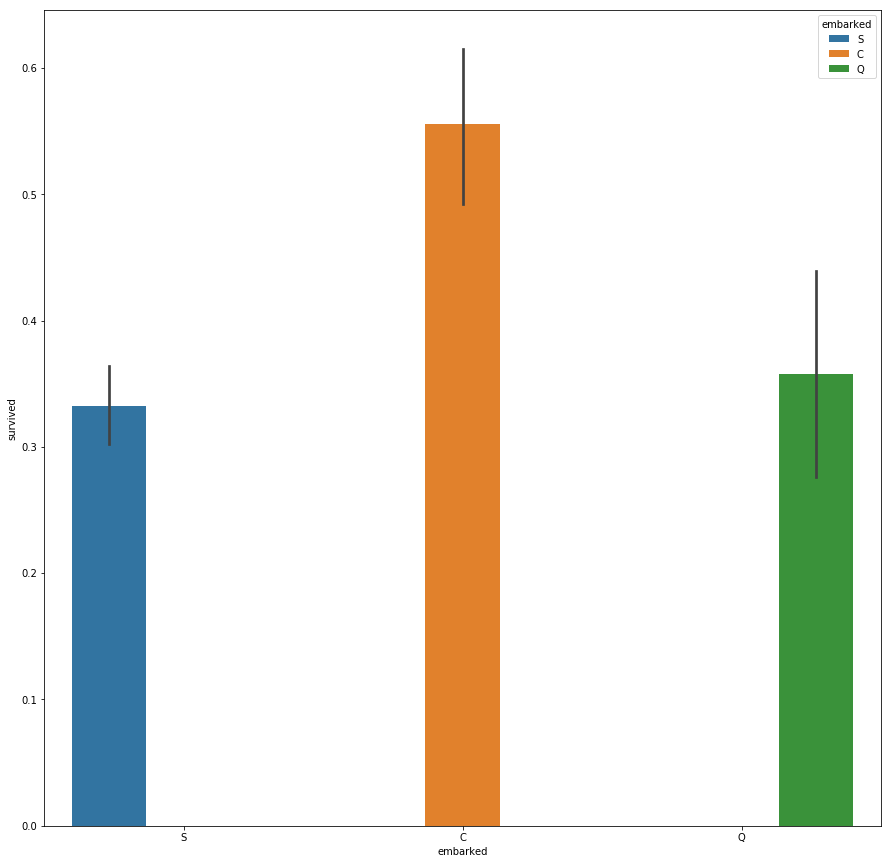

In [76]:
plt.figure(figsize=[15, 15])
sns.barplot(x='embarked', y='survived', hue='embarked', data=titanic)

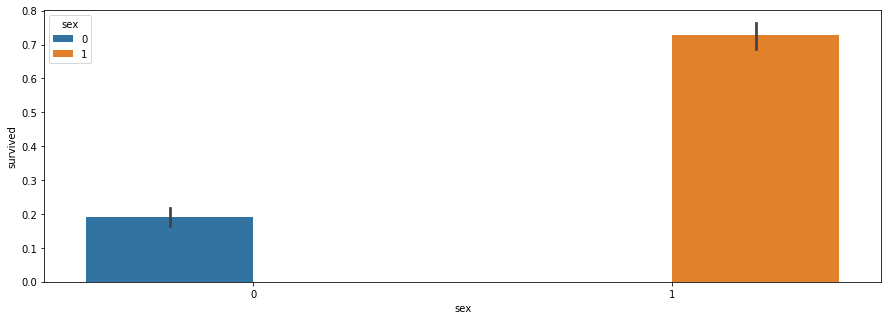

In [71]:
plt.figure(figsize=[15, 5])
sns.barplot(x='sex', y='survived', hue='sex', data=titanic)

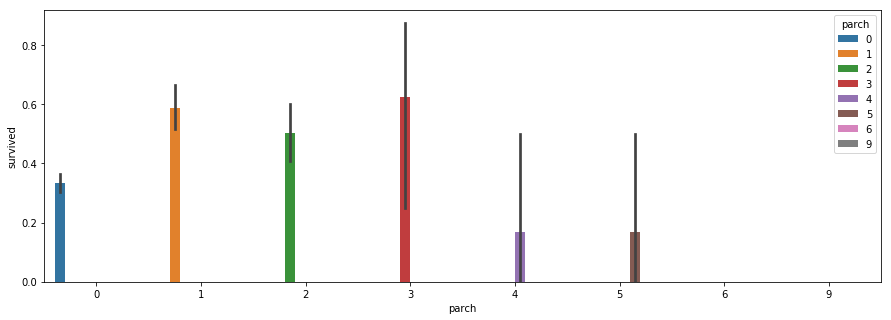

In [72]:
plt.figure(figsize=[15, 5])
sns.barplot(x='parch', y='survived', hue='parch', data=titanic)

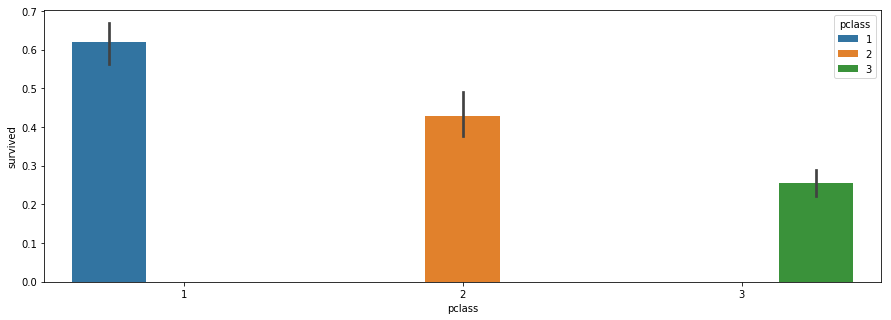

In [73]:
plt.figure(figsize=[15, 5])
sns.barplot(x='pclass', y='survived', hue='pclass', data=titanic)

## Hypothyroid

In [12]:
hypothyroid.head().T

,0,1,2,3,4
age,41,23,46,70,70
sex,F,F,M,F,F
on_thyroxine,f,f,f,t,f
query_on_thyroxine,f,f,f,f,f
on_antithyroid_medication,f,f,f,f,f
sick,f,f,f,f,f
pregnant,f,f,f,f,f
thyroid_surgery,f,f,f,f,f
I131_treatment,f,f,f,f,f
query_hypothyroid,f,f,f,f,f


In [11]:
hypothyroid.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 30 columns):
age                          3772 non-null object
sex                          3772 non-null object
on_thyroxine                 3772 non-null object
query_on_thyroxine           3772 non-null object
on_antithyroid_medication    3772 non-null object
sick                         3772 non-null object
pregnant                     3772 non-null object
thyroid_surgery              3772 non-null object
I131_treatment               3772 non-null object
query_hypothyroid            3772 non-null object
query_hyperthyroid           3772 non-null object
lithium                      3772 non-null object
goitre                       3772 non-null object
tumor                        3772 non-null object
hypopituitary                3772 non-null object
psych                        3772 non-null object
TSH_measured                 3772 non-null object
TSH                          3772 non-null 

# Data transformations

## Titanic

In [23]:
titanic.sex.replace({'male': 0, 'female': 1}, inplace=True)

In [77]:
titanic.embarked.replace({'S': 0, 'C': 1, 'Q': 2}, inplace=True)

In [24]:
titanic.age.fillna(titanic.age.mean(), inplace=True)